# Алиев Азнаур, Б01-909 

## ОДУ X.9.7.

# Пример жесткой системы — модель химических реакций Робертсона

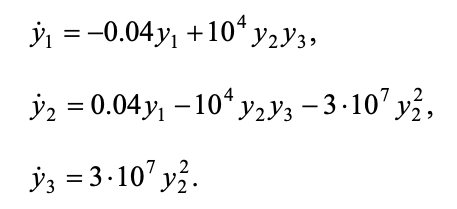

# Это автономная система, воспользуемся методом Розенброка

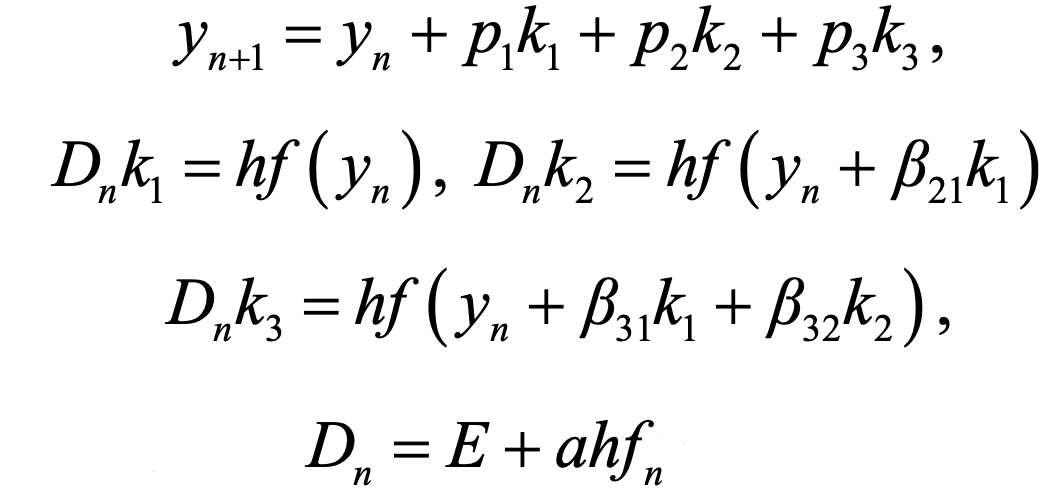

In [414]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np

In [415]:
def derivative(Y_):
    Y = copy.deepcopy(Y_)
    Y[0] = -0.04 * Y_[0] + 1e4 * Y_[1] * Y_[2]
    Y[1] = 0.04 * Y_[0] - (1e4 * Y_[1] * Y_[2]) - 3e7 * (Y_[1]**2)
    Y[2] = 3e7 * (Y_[1]**2)
    return Y

## Матрица Якоби

In [416]:
# начальные условия
y0 = [1, 0, 0]
# шаг
h = 1e-3
# временный отрезки
times = [40, 1000, 10000, 100000] 
# коэффы из условия усточивости трехстадийного метода типо Розенброка
p1 =  0.4358 
p2 = 0.4782
p3 = 0.08589
a = 0.4358
b1 = 0.4358
b2 = 0.4358
b3 = -2.1160

In [417]:
def Jacob(Y):
    J = np.zeros((len(Y), len(Y)))
    J[0][0] = -0.04
    J[0][1] = 1e4*Y[2]
    J[0][2] = 1e4*Y[1]
    J[1][0] = 0.04
    J[1][1] = -1e4*Y[2] - 6e7*Y[1]
    J[1][2] = -1e4*Y[1] 
    J[2][0] = 0
    J[2][1] = 6.e7*Y[1]
    J[2][2] = 0
    
    return J

In [418]:
def Gauss(matrix, Y):
    A = copy.copy(matrix)
    X = copy.copy(Y)
    X = X.reshape(X.shape[0], 1)
    rows, cols = matrix.shape
    for i in range(rows):
        for j in range(i + 1, cols):
            A[i, j] = A[i, j] / A[i, i]

        X[i] = X[i] / A[i, i]
        A[i][i] = 1

        for k in range(rows):
            if (k != i):
                c = A[k, i]
                A[k] = A[k] - c*A[i]
                X[k] = X[k] - c*X[i]

    X = X.ravel()
    return X

In [421]:
def Rozenbrock(y):
    Dn = np.eye(len(y)) + a * h * Jacob(y)
    k1 = Gauss(Dn, h * derivative(y))
    k2 = Gauss(Dn, h * derivative(y + b1 * k1))
    k3 = Gauss(Dn, h * derivative(y + b2 * k1 + b3 * k2))
    y = y + p1 * k1 + p2 * k2 + p3 * k3
    return y

In [422]:
X = np.zeros((times[0], 3))
X[0] = np.array(y0)
for i in range(1, times[0]):
    X[i] = Rozenbrock(X[i - 1])

# График концентраций от времени

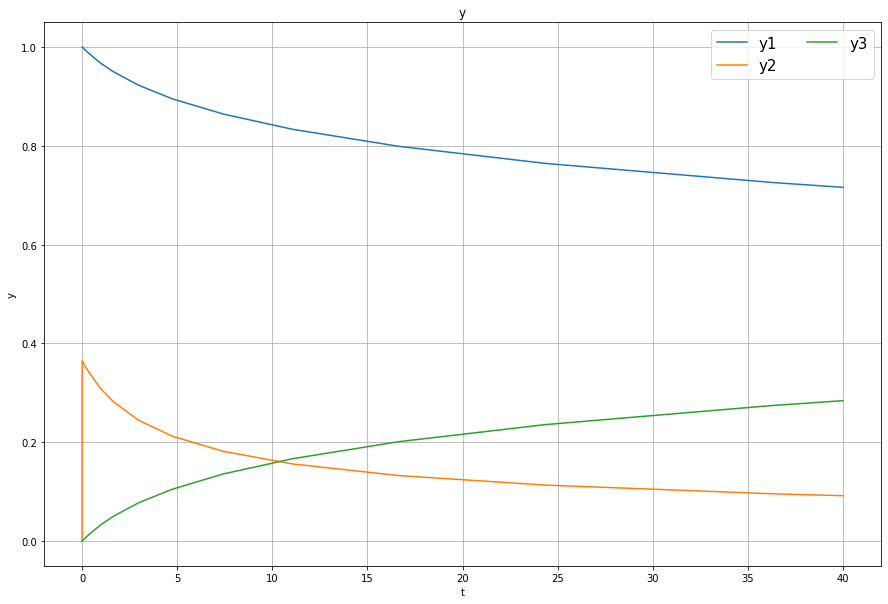

In [423]:
t = np.arange(times[0])

plt.figure(figsize = [15, 10])
plt.plot(t, X[:, 0], label = 'y1')
plt.plot(t, X[:, 1], label = 'y2')
plt.plot(t, X[:, 2], label = 'y3')
plt.legend(fontsize = 15, ncol = 2)
plt.xlabel("t")
plt.ylabel("y")
plt.title("y")
plt.tight_layout() 
plt.grid()
plt.show()

In [424]:
X = np.zeros((int(times[1]), 3))
X[0] = np.array(y0)
for i in range(1, times[1]):
    X[i] = Rozenbrock(X[i - 1])

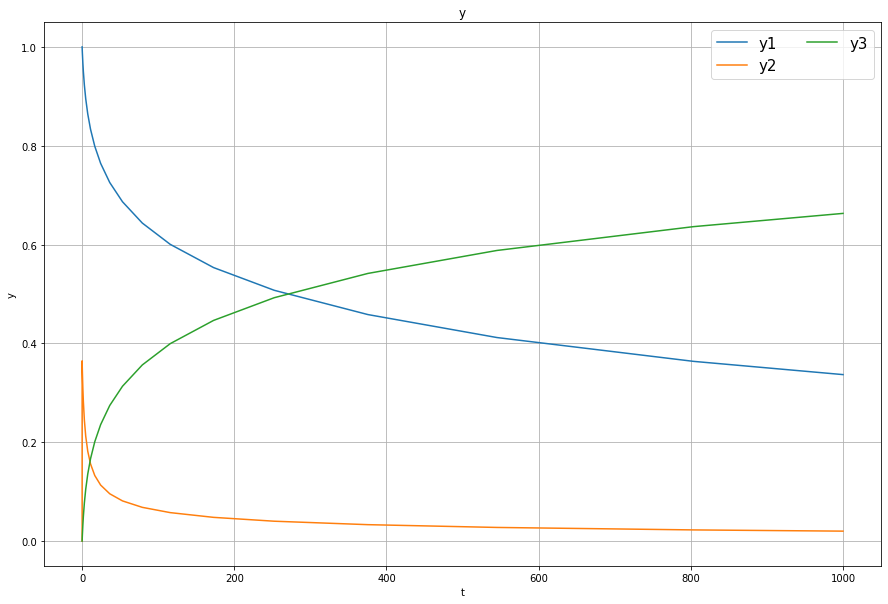

In [425]:
t = np.arange(times[1])

plt.figure(figsize = [15, 10])
plt.plot(t, X[:, 0], label = 'y1')
plt.plot(t, X[:, 1], label = 'y2')
plt.plot(t, X[:, 2], label = 'y3')
plt.legend(fontsize = 15, ncol = 2)
plt.xlabel("t")
plt.ylabel("y")
plt.title("y")
plt.tight_layout() 
plt.grid()

In [426]:
X = np.zeros((int(times[2]), 3))
X[0] = np.array(y0)
for i in range(1, times[2]):
    X[i] = Rozenbrock(X[i - 1])

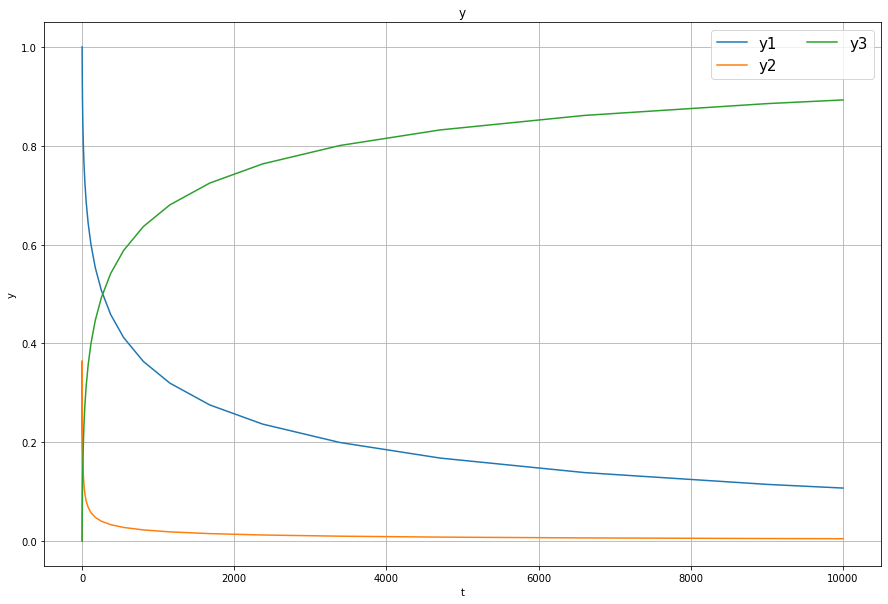

In [427]:
t = np.arange(times[2])

plt.figure(figsize = [15, 10])
plt.plot(t, X[:, 0], label = 'y1')
plt.plot(t, X[:, 1], label = 'y2')
plt.plot(t, X[:, 2], label = 'y3')
plt.legend(fontsize = 15, ncol = 2)
plt.xlabel("t")
plt.ylabel("y")
plt.title("y")
plt.tight_layout() 
plt.grid()

## Больший временной интервал взять не получится,тк происходит переполнение переменных

In [428]:
# times[3] = 100000
# X = np.zeros((int(times[3]), 3))
# X[0] = np.array(y0)
# for i in range(1, int(times[3])):
#     X[i] = Rozenbrock(X[i - 1])b

# Полученные графики концентраций похожи на правду

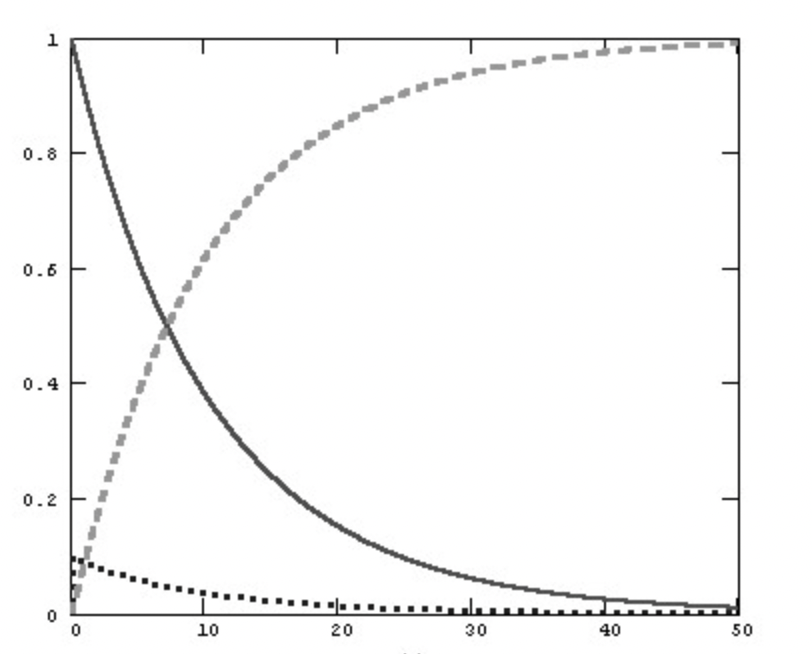

# [График](https://www.keldysh.ru/comma/html/ds/chem.html)
# [Методичка](https://ics.pnu.edu.ru/media/2015/N43_06.pdf)